In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from sklearn.cluster import KMeans
import random

### Data representation

In [147]:
data = pd.read_csv("data.csv", skiprows = 5, header = None, sep="\s+")
data.head(3)
train_data = data[2]

In [183]:
level = 7
recunstruct = 2**level
print("Dec level = %d, recunstruct = %d"%(level,recunstruct))
coefsd = pywt.downcoef('d', train_data, 'haar', level=level)    
coefsa = pywt.downcoef('a', train_data, 'haar', level=level)  

Dec level = 7, recunstruct = 128


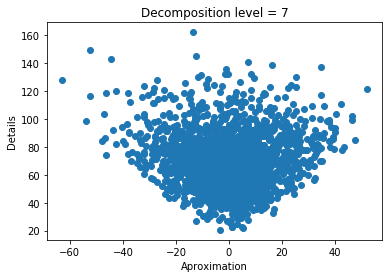

In [184]:
plt.scatter(coefsd, coefsa)
plt.title("Decomposition level = %d"%level)
plt.xlabel('Aproximation')
plt.ylabel('Details');

### Clastering

In [185]:
X = np.asarray(list(zip(coefsd, coefsa)))

In [186]:
n_clusters = 90
kmeans = KMeans(n_clusters= n_clusters)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

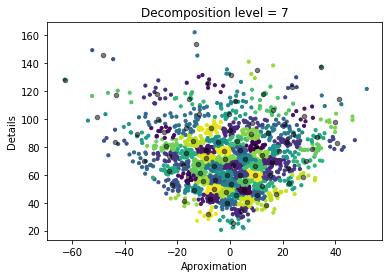

In [187]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=0.5);
plt.title("Decomposition level = %d"%level)
plt.xlabel('Aproximation')
plt.ylabel('Details')
plt.show();

### Result visualization

In [188]:
every_point_classes = [y for y in y_kmeans for i in range(recunstruct) ]
every_point_classes = np.asarray(every_point_classes)


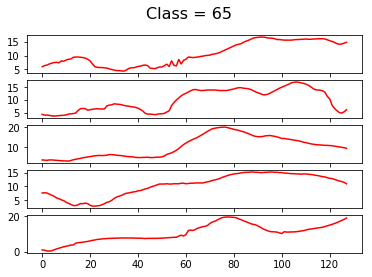

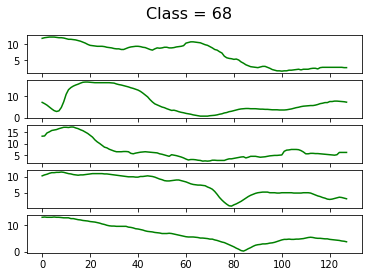

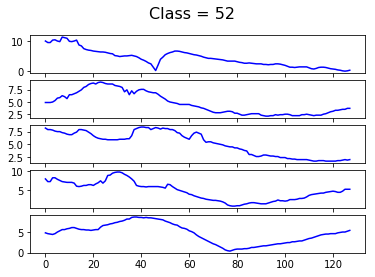

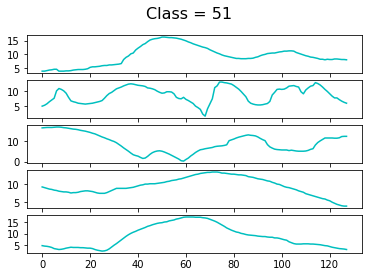

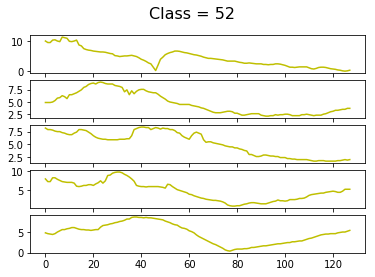

In [191]:
stop_point = len(train_data)
colors = ['r', 'g', 'b','c','y']
graph_count = 5
for j in range(5):
    claster_class = random.randint(1,n_clusters)
    mask = every_point_classes[:stop_point] == claster_class
    indx = np.where(mask)    
    count = graph_count
    
    fig, axs = plt.subplots(count, 1, constrained_layout=False)
    fig.suptitle('Class = %d'%claster_class, fontsize=16)
    for i in range(count): 
        axs[i].plot(list(train_data[indx[0][i*recunstruct:(i+1)*recunstruct]]), color = colors[j]);
    #fig.savefig('Class_%d.png'%cluster_cluss)
    plt.show();